In [1]:
SensorNum=4 # Sensor number
WindowWidth=[16,32,64,128,256,512,1024] # Window Width
OverlapArray=[4,8,16,32,64,128,256] # sliding window
width=1000 # graph width 
EncodingDim=[4,8,12,16,32,64] # number of hidden layer note
Axis='AccX' # Axis

WORKSPACE_PATH = "/media/takeyama/HD-PZU3/01_TAKEYAMA_WORKSPACE/02_CommonData/2016-07-25"

In [2]:
import numpy as np
import pandas as pd
from scipy import fftpack
from scipy import signal
import time
import os
import matplotlib.pyplot as plt
import pylab
import pickle
import copy

import processing
import window

import matplotlib.animation as animation
import datetime

%matplotlib inline

In [3]:
from keras.models import Sequential
from keras.datasets import cifar10
from keras.layers import Dense, Activation, Flatten
from keras.optimizers import Adadelta
from keras.utils import np_utils
from keras.layers.convolutional import Convolution2D, MaxPooling2D
from keras.utils.visualize_util import model_to_dot, plot
from keras import backend as K
from keras.layers import Input, Dense
from keras.models import Model
from keras.callbacks import EarlyStopping

import matplotlib.image as mpimg


Using Theano backend.
Using gpu device 0: GeForce GTX 1080 (CNMeM is disabled, cuDNN 5005)


In [4]:
DataName='sensor'+str(SensorNum)+'_'+Axis
SensorName='sensor'+str(SensorNum)
DicName='MemSensor'+str(SensorNum)

In [5]:
if not os.path.exists(WORKSPACE_PATH+'/study/'+DataName+'/'): os.makedirs(WORKSPACE_PATH+'/study/'+DataName+'/')
StudyDataPath=WORKSPACE_PATH+'/study/'+DataName+'/'

if not os.path.exists(WORKSPACE_PATH+'/graph/'+DataName+'/'): os.makedirs(WORKSPACE_PATH+'/graph/'+DataName+'/')
GlaphDataPath=WORKSPACE_PATH+'/graph/'+DataName+'/'

if not os.path.exists(WORKSPACE_PATH+'/modelPic/'+DataName+'/'): os.makedirs(WORKSPACE_PATH+'/modelPic/'+DataName+'/')
StudyDataModelPicPath=WORKSPACE_PATH+'/modelPic/'+DataName+'/'

if not os.path.exists(WORKSPACE_PATH+'/window/'+DataName+'/'): os.makedirs(WORKSPACE_PATH+'/window/'+DataName+'/')
WindowDataPath=WORKSPACE_PATH+'/window/'+DataName+'/'

RawDataPath="/media/takeyama/HD-PZU3/01_TAKEYAMA_WORKSPACE/02_CommonData/raw/"

**Phase1 計測データの取得**

In [6]:
dic=processing.LoadDicDataFromFileNPZ(RawDataPath+DicName)

**Phase2 window flame 作成 & Learning**

AccX is registed now
Build Complete
(254742,)
windowData's num =63682
SourceData's aborting data = 2
window shape is (63682, 16, 1)
hiden node = 4
Train on 63682 samples, validate on 63682 samples
Epoch 1/50
24s - loss: 0.0238 - val_loss: 0.0029
Epoch 2/50
29s - loss: 0.0016 - val_loss: 8.4469e-04
Epoch 3/50
38s - loss: 7.2341e-04 - val_loss: 5.9382e-04
Epoch 4/50
40s - loss: 5.4069e-04 - val_loss: 4.4931e-04
Epoch 5/50
39s - loss: 4.4753e-04 - val_loss: 4.1726e-04
Epoch 6/50
37s - loss: 3.9122e-04 - val_loss: 3.3950e-04
Epoch 7/50
38s - loss: 3.4699e-04 - val_loss: 3.2569e-04
Epoch 8/50
47s - loss: 3.1067e-04 - val_loss: 2.7753e-04
Epoch 9/50
58s - loss: 2.8233e-04 - val_loss: 2.5309e-04
Epoch 10/50
62s - loss: 2.6278e-04 - val_loss: 3.8202e-04
Epoch 11/50
62s - loss: 2.4962e-04 - val_loss: 4.5182e-04
Epoch 12/50
62s - loss: 2.4179e-04 - val_loss: 2.1750e-04
Epoch 13/50
62s - loss: 2.3615e-04 - val_loss: 2.3322e-04
Epoch 14/50
62s - loss: 2.3356e-04 - val_loss: 2.0886e-04
Epoch 15/50


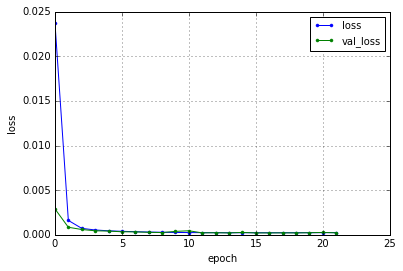

hiden node = 8
Train on 63682 samples, validate on 63682 samples
Epoch 1/50
62s - loss: 0.0148 - val_loss: 0.0016
Epoch 2/50
62s - loss: 9.0737e-04 - val_loss: 5.5355e-04
Epoch 3/50
62s - loss: 4.9647e-04 - val_loss: 3.9644e-04
Epoch 4/50
62s - loss: 3.7731e-04 - val_loss: 3.1288e-04
Epoch 5/50
62s - loss: 3.2010e-04 - val_loss: 0.0018
Epoch 6/50
61s - loss: 2.8083e-04 - val_loss: 3.4164e-04
Epoch 7/50
61s - loss: 2.5406e-04 - val_loss: 2.0322e-04
Epoch 8/50
61s - loss: 2.3530e-04 - val_loss: 4.3602e-04
Epoch 9/50
62s - loss: 2.2151e-04 - val_loss: 3.0248e-04
Epoch 10/50
62s - loss: 2.0841e-04 - val_loss: 1.5342e-04
Epoch 11/50
62s - loss: 2.0234e-04 - val_loss: 1.4230e-04
Epoch 12/50
62s - loss: 1.9157e-04 - val_loss: 1.5872e-04
Epoch 13/50
62s - loss: 1.8332e-04 - val_loss: 1.2449e-04
Epoch 14/50
62s - loss: 1.7957e-04 - val_loss: 1.4961e-04
Epoch 15/50
62s - loss: 1.7160e-04 - val_loss: 1.2066e-04
Epoch 16/50
61s - loss: 1.6431e-04 - val_loss: 1.2420e-04
Epoch 17/50
62s - loss: 1.64

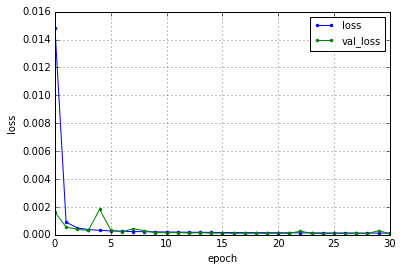

hiden node = 12
Train on 63682 samples, validate on 63682 samples
Epoch 1/50
61s - loss: 0.0095 - val_loss: 0.0010
Epoch 2/50
62s - loss: 7.9163e-04 - val_loss: 5.8189e-04
Epoch 3/50
62s - loss: 5.2465e-04 - val_loss: 6.7287e-04
Epoch 4/50
61s - loss: 3.8610e-04 - val_loss: 3.1008e-04
Epoch 5/50
61s - loss: 3.0930e-04 - val_loss: 3.2250e-04
Epoch 6/50
61s - loss: 2.5945e-04 - val_loss: 1.8470e-04
Epoch 7/50
62s - loss: 2.2894e-04 - val_loss: 1.8295e-04
Epoch 8/50
62s - loss: 2.1079e-04 - val_loss: 1.4469e-04
Epoch 9/50
61s - loss: 1.9072e-04 - val_loss: 5.9720e-04
Epoch 10/50
61s - loss: 1.8363e-04 - val_loss: 8.3732e-04
Epoch 11/50
61s - loss: 1.7136e-04 - val_loss: 1.1283e-04
Epoch 12/50
62s - loss: 1.6620e-04 - val_loss: 1.1876e-04
Epoch 13/50
61s - loss: 1.6143e-04 - val_loss: 9.7832e-05
Epoch 14/50
62s - loss: 1.5445e-04 - val_loss: 9.4435e-05
Epoch 15/50
62s - loss: 1.4903e-04 - val_loss: 8.5166e-05
Epoch 16/50
61s - loss: 1.3928e-04 - val_loss: 1.2770e-04
Epoch 17/50
62s - loss:

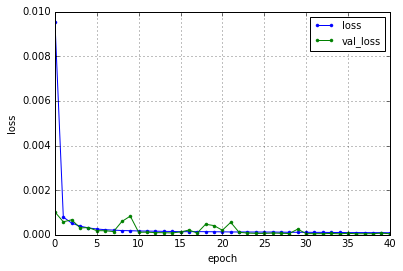

hiden node = 16
Train on 63682 samples, validate on 63682 samples
Epoch 1/50
61s - loss: 0.0051 - val_loss: 7.0960e-04
Epoch 2/50
61s - loss: 5.6516e-04 - val_loss: 4.7592e-04
Epoch 3/50
62s - loss: 3.9127e-04 - val_loss: 2.8772e-04
Epoch 4/50
62s - loss: 3.1661e-04 - val_loss: 2.8783e-04
Epoch 5/50
61s - loss: 2.7321e-04 - val_loss: 1.8106e-04
Epoch 6/50
62s - loss: 2.4476e-04 - val_loss: 1.6852e-04
Epoch 7/50
62s - loss: 2.2789e-04 - val_loss: 2.4974e-04
Epoch 8/50
62s - loss: 2.1728e-04 - val_loss: 1.3849e-04
Epoch 9/50
62s - loss: 2.0575e-04 - val_loss: 1.2237e-04
Epoch 10/50
61s - loss: 1.9579e-04 - val_loss: 2.3950e-04
Epoch 11/50
62s - loss: 1.9628e-04 - val_loss: 1.7671e-04
Epoch 12/50
61s - loss: 1.9462e-04 - val_loss: 1.5732e-04
Epoch 13/50
62s - loss: 1.8340e-04 - val_loss: 4.3907e-04
Epoch 14/50
61s - loss: 1.8178e-04 - val_loss: 9.8048e-05
Epoch 15/50
61s - loss: 1.7861e-04 - val_loss: 0.0016
Epoch 16/50
62s - loss: 1.6830e-04 - val_loss: 1.9940e-04
Epoch 17/50
62s - loss:

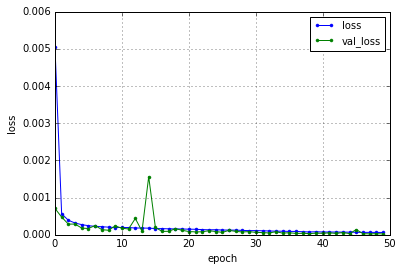

hiden node = 32
Train on 63682 samples, validate on 63682 samples
Epoch 1/50
65s - loss: 0.0054 - val_loss: 2.8397e-04
Epoch 2/50
65s - loss: 2.7258e-04 - val_loss: 1.8572e-04
Epoch 3/50
65s - loss: 2.4167e-04 - val_loss: 1.8411e-04
Epoch 4/50
65s - loss: 2.3966e-04 - val_loss: 1.4977e-04
Epoch 5/50
65s - loss: 2.1906e-04 - val_loss: 1.1328e-04
Epoch 6/50
65s - loss: 2.2211e-04 - val_loss: 2.6369e-04
Epoch 7/50
65s - loss: 2.1242e-04 - val_loss: 2.4429e-04
Epoch 8/50
65s - loss: 2.1314e-04 - val_loss: 1.8777e-04
Epoch 9/50
64s - loss: 2.0417e-04 - val_loss: 1.0923e-04
Epoch 10/50
65s - loss: 1.9841e-04 - val_loss: 1.1307e-04
Epoch 11/50
65s - loss: 2.0155e-04 - val_loss: 2.8308e-04
Epoch 12/50
65s - loss: 1.9447e-04 - val_loss: 0.0022
Epoch 13/50
64s - loss: 1.8992e-04 - val_loss: 1.0064e-04
Epoch 14/50
65s - loss: 1.8757e-04 - val_loss: 9.5560e-05
Epoch 15/50
65s - loss: 1.8525e-04 - val_loss: 9.6134e-05
Epoch 16/50
65s - loss: 1.8567e-04 - val_loss: 1.8283e-04
Epoch 17/50
64s - loss:

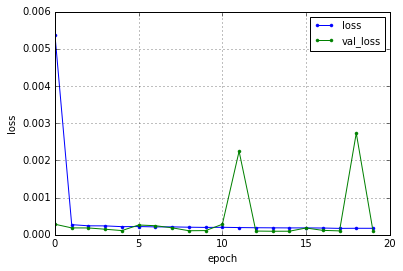

hiden node = 64
Train on 63682 samples, validate on 63682 samples
Epoch 1/50
62s - loss: 0.0020 - val_loss: 1.4658e-04
Epoch 2/50
62s - loss: 2.7671e-04 - val_loss: 1.1864e-04
Epoch 3/50
61s - loss: 2.6733e-04 - val_loss: 3.8687e-04
Epoch 4/50
62s - loss: 2.5537e-04 - val_loss: 1.1102e-04
Epoch 5/50
62s - loss: 2.5107e-04 - val_loss: 2.0522e-04
Epoch 6/50
62s - loss: 2.4196e-04 - val_loss: 9.6135e-05
Epoch 7/50
61s - loss: 2.4021e-04 - val_loss: 9.8193e-05
Epoch 8/50
61s - loss: 2.2262e-04 - val_loss: 8.6065e-05
Epoch 9/50
61s - loss: 2.2675e-04 - val_loss: 8.4544e-05
Epoch 10/50
61s - loss: 2.0509e-04 - val_loss: 1.0077e-04
Epoch 11/50
61s - loss: 2.1454e-04 - val_loss: 9.2599e-05
Epoch 12/50
61s - loss: 1.9710e-04 - val_loss: 1.0764e-04
Epoch 13/50
61s - loss: 2.0238e-04 - val_loss: 3.1947e-04
Epoch 14/50
62s - loss: 1.9073e-04 - val_loss: 2.4102e-04
Epoch 15/50
61s - loss: 1.9210e-04 - val_loss: 2.4640e-04


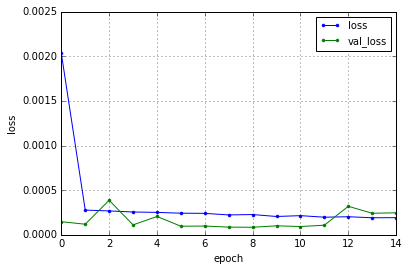

AccX is registed now
Build Complete
(254742,)
windowData's num =31839
SourceData's aborting data = 6
window shape is (31839, 32, 1)
hiden node = 4
Train on 31839 samples, validate on 31839 samples
Epoch 1/50
15s - loss: 0.0629 - val_loss: 0.0103
Epoch 2/50
15s - loss: 0.0079 - val_loss: 0.0058
Epoch 3/50
15s - loss: 0.0040 - val_loss: 0.0029
Epoch 4/50
15s - loss: 0.0026 - val_loss: 0.0022
Epoch 5/50
15s - loss: 0.0020 - val_loss: 0.0016
Epoch 6/50
15s - loss: 0.0016 - val_loss: 0.0013
Epoch 7/50
15s - loss: 0.0013 - val_loss: 0.0011
Epoch 8/50
15s - loss: 0.0011 - val_loss: 9.1109e-04
Epoch 9/50
15s - loss: 9.6765e-04 - val_loss: 8.0410e-04
Epoch 10/50
15s - loss: 8.9560e-04 - val_loss: 7.3882e-04
Epoch 11/50
15s - loss: 8.4521e-04 - val_loss: 8.0828e-04
Epoch 12/50
15s - loss: 7.9454e-04 - val_loss: 0.0012
Epoch 13/50
15s - loss: 7.5460e-04 - val_loss: 0.0010
Epoch 14/50
15s - loss: 7.3140e-04 - val_loss: 5.8569e-04
Epoch 15/50
15s - loss: 6.9074e-04 - val_loss: 6.0207e-04
Epoch 16/5

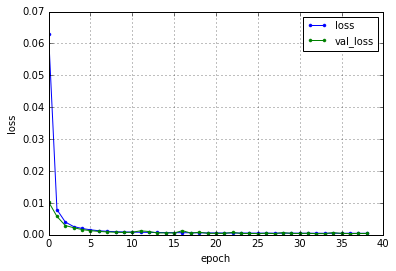

hiden node = 8
Train on 31839 samples, validate on 31839 samples
Epoch 1/50
15s - loss: 0.0536 - val_loss: 0.0055
Epoch 2/50
15s - loss: 0.0035 - val_loss: 0.0022
Epoch 3/50
15s - loss: 0.0019 - val_loss: 0.0014
Epoch 4/50
15s - loss: 0.0013 - val_loss: 9.6647e-04
Epoch 5/50
15s - loss: 9.8254e-04 - val_loss: 0.0056
Epoch 6/50
15s - loss: 8.4355e-04 - val_loss: 8.1554e-04
Epoch 7/50
15s - loss: 7.6449e-04 - val_loss: 5.9577e-04
Epoch 8/50
15s - loss: 7.1892e-04 - val_loss: 5.7534e-04
Epoch 9/50
15s - loss: 6.7941e-04 - val_loss: 0.0022
Epoch 10/50
15s - loss: 6.2855e-04 - val_loss: 4.6272e-04
Epoch 11/50
14s - loss: 6.1674e-04 - val_loss: 4.0101e-04
Epoch 12/50
15s - loss: 5.9529e-04 - val_loss: 4.1385e-04
Epoch 13/50
15s - loss: 5.6522e-04 - val_loss: 0.0011
Epoch 14/50
15s - loss: 5.5542e-04 - val_loss: 0.0011
Epoch 15/50
15s - loss: 5.5146e-04 - val_loss: 3.2535e-04
Epoch 16/50
14s - loss: 5.2746e-04 - val_loss: 3.1631e-04
Epoch 17/50
15s - loss: 5.0284e-04 - val_loss: 3.0104e-04
Ep

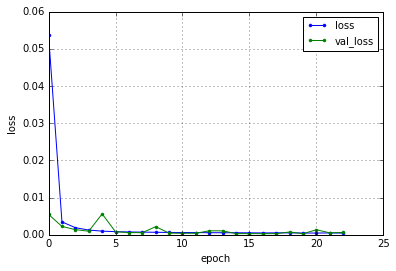

hiden node = 12
Train on 31839 samples, validate on 31839 samples
Epoch 1/50
14s - loss: 0.0328 - val_loss: 0.0033
Epoch 2/50
16s - loss: 0.0023 - val_loss: 0.0015
Epoch 3/50
16s - loss: 0.0014 - val_loss: 9.8782e-04
Epoch 4/50
14s - loss: 0.0011 - val_loss: 8.5514e-04
Epoch 5/50
14s - loss: 9.5605e-04 - val_loss: 7.1272e-04
Epoch 6/50
16s - loss: 8.5272e-04 - val_loss: 6.6999e-04
Epoch 7/50
16s - loss: 8.4563e-04 - val_loss: 5.8668e-04
Epoch 8/50
14s - loss: 8.0024e-04 - val_loss: 5.3126e-04
Epoch 9/50
14s - loss: 7.5468e-04 - val_loss: 5.0469e-04
Epoch 10/50
16s - loss: 7.5121e-04 - val_loss: 5.9493e-04
Epoch 11/50
16s - loss: 7.2292e-04 - val_loss: 5.1146e-04
Epoch 12/50
14s - loss: 7.2607e-04 - val_loss: 4.4427e-04
Epoch 13/50
14s - loss: 6.6943e-04 - val_loss: 0.0011
Epoch 14/50
16s - loss: 6.4130e-04 - val_loss: 0.0022
Epoch 15/50
16s - loss: 6.2819e-04 - val_loss: 5.6655e-04
Epoch 16/50
14s - loss: 6.2146e-04 - val_loss: 3.7458e-04
Epoch 17/50
14s - loss: 6.1073e-04 - val_loss: 

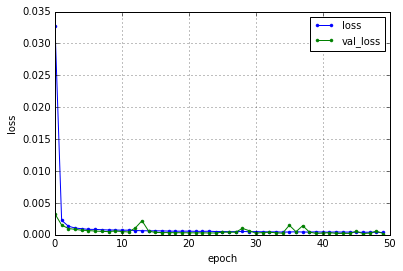

hiden node = 16
Train on 31839 samples, validate on 31839 samples
Epoch 1/50
15s - loss: 0.0214 - val_loss: 0.0026
Epoch 2/50
15s - loss: 0.0018 - val_loss: 0.0013
Epoch 3/50
15s - loss: 0.0011 - val_loss: 8.2910e-04
Epoch 4/50
14s - loss: 8.7826e-04 - val_loss: 0.0012
Epoch 5/50
15s - loss: 7.8099e-04 - val_loss: 8.9366e-04
Epoch 6/50
15s - loss: 7.4296e-04 - val_loss: 5.1477e-04
Epoch 7/50
15s - loss: 7.4867e-04 - val_loss: 0.0011
Epoch 8/50
14s - loss: 7.1058e-04 - val_loss: 8.7101e-04
Epoch 9/50
15s - loss: 6.5748e-04 - val_loss: 7.1717e-04
Epoch 10/50
15s - loss: 6.5380e-04 - val_loss: 4.4542e-04
Epoch 11/50
15s - loss: 6.5592e-04 - val_loss: 8.7328e-04
Epoch 12/50
15s - loss: 6.2852e-04 - val_loss: 6.4325e-04
Epoch 13/50
15s - loss: 6.3669e-04 - val_loss: 4.0713e-04
Epoch 14/50
15s - loss: 5.9863e-04 - val_loss: 3.8492e-04
Epoch 15/50
15s - loss: 6.0859e-04 - val_loss: 3.8158e-04
Epoch 16/50
15s - loss: 5.9041e-04 - val_loss: 5.2457e-04
Epoch 17/50
15s - loss: 5.8945e-04 - val_lo

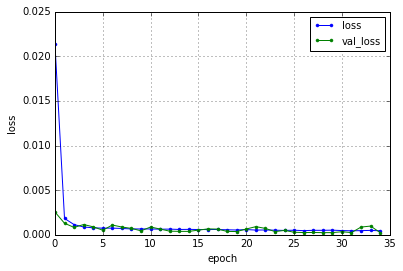

hiden node = 32
Train on 31839 samples, validate on 31839 samples
Epoch 1/50
15s - loss: 0.0154 - val_loss: 0.0013
Epoch 2/50
15s - loss: 0.0011 - val_loss: 6.8707e-04
Epoch 3/50
15s - loss: 8.3920e-04 - val_loss: 8.5133e-04
Epoch 4/50
15s - loss: 7.6891e-04 - val_loss: 4.3958e-04
Epoch 5/50
15s - loss: 7.3651e-04 - val_loss: 4.1646e-04
Epoch 6/50
15s - loss: 6.8752e-04 - val_loss: 4.1438e-04
Epoch 7/50
15s - loss: 7.1640e-04 - val_loss: 5.2102e-04
Epoch 8/50
15s - loss: 6.2999e-04 - val_loss: 3.4905e-04
Epoch 9/50
15s - loss: 6.4168e-04 - val_loss: 7.6577e-04
Epoch 10/50
15s - loss: 6.5716e-04 - val_loss: 4.5379e-04
Epoch 11/50
14s - loss: 6.3290e-04 - val_loss: 4.5711e-04
Epoch 12/50
15s - loss: 6.2314e-04 - val_loss: 0.0012
Epoch 13/50
16s - loss: 6.2472e-04 - val_loss: 3.6376e-04
Epoch 14/50
15s - loss: 5.9581e-04 - val_loss: 8.5391e-04


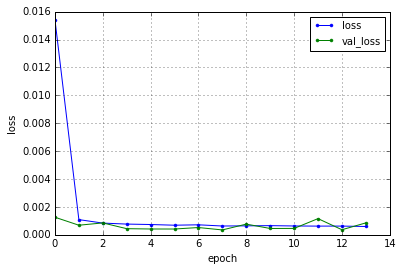

hiden node = 64
Train on 31839 samples, validate on 31839 samples
Epoch 1/50
14s - loss: 0.0125 - val_loss: 0.0012
Epoch 2/50
15s - loss: 9.1379e-04 - val_loss: 0.0023
Epoch 3/50
15s - loss: 7.9704e-04 - val_loss: 5.5340e-04
Epoch 4/50
15s - loss: 7.6643e-04 - val_loss: 9.4263e-04
Epoch 5/50
14s - loss: 7.3365e-04 - val_loss: 3.0242e-04
Epoch 6/50
15s - loss: 6.9820e-04 - val_loss: 4.6025e-04
Epoch 7/50
15s - loss: 6.7306e-04 - val_loss: 3.4789e-04
Epoch 8/50
15s - loss: 6.9598e-04 - val_loss: 2.6725e-04
Epoch 9/50
14s - loss: 6.7409e-04 - val_loss: 8.9140e-04
Epoch 10/50
15s - loss: 6.7866e-04 - val_loss: 2.2917e-04
Epoch 11/50
15s - loss: 6.6112e-04 - val_loss: 3.5955e-04
Epoch 12/50
15s - loss: 6.8552e-04 - val_loss: 5.2452e-04
Epoch 13/50
14s - loss: 6.1760e-04 - val_loss: 3.8740e-04
Epoch 14/50
14s - loss: 6.0970e-04 - val_loss: 2.6541e-04
Epoch 15/50
15s - loss: 6.2579e-04 - val_loss: 0.0034
Epoch 16/50
15s - loss: 5.8450e-04 - val_loss: 4.0617e-04


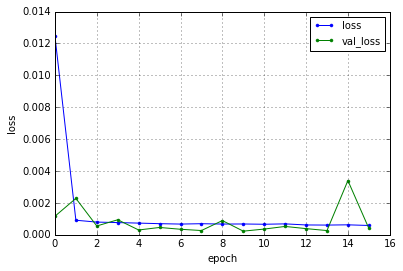

AccX is registed now
Build Complete
(254742,)
windowData's num =15918
SourceData's aborting data = 6
window shape is (15918, 64, 1)
hiden node = 4
Train on 15918 samples, validate on 15918 samples
Epoch 1/50
3s - loss: 0.1568 - val_loss: 0.0315
Epoch 2/50
3s - loss: 0.0265 - val_loss: 0.0230
Epoch 3/50
3s - loss: 0.0214 - val_loss: 0.0200
Epoch 4/50
3s - loss: 0.0177 - val_loss: 0.0161
Epoch 5/50
3s - loss: 0.0136 - val_loss: 0.0128
Epoch 6/50
3s - loss: 0.0109 - val_loss: 0.0099
Epoch 7/50
4s - loss: 0.0093 - val_loss: 0.0084
Epoch 8/50
4s - loss: 0.0082 - val_loss: 0.0089
Epoch 9/50
4s - loss: 0.0071 - val_loss: 0.0065
Epoch 10/50
4s - loss: 0.0061 - val_loss: 0.0065
Epoch 11/50
4s - loss: 0.0053 - val_loss: 0.0047
Epoch 12/50
4s - loss: 0.0047 - val_loss: 0.0066
Epoch 13/50
3s - loss: 0.0040 - val_loss: 0.0041
Epoch 14/50
3s - loss: 0.0037 - val_loss: 0.0046
Epoch 15/50
3s - loss: 0.0034 - val_loss: 0.0035
Epoch 16/50
3s - loss: 0.0035 - val_loss: 0.0025
Epoch 17/50
3s - loss: 0.003

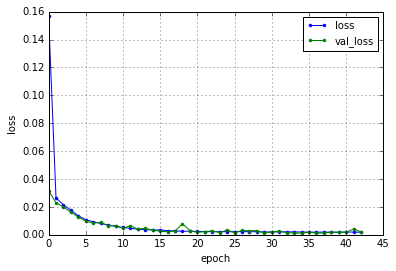

hiden node = 8
Train on 15918 samples, validate on 15918 samples
Epoch 1/50
3s - loss: 0.1348 - val_loss: 0.0247
Epoch 2/50
3s - loss: 0.0180 - val_loss: 0.0126
Epoch 3/50
3s - loss: 0.0106 - val_loss: 0.0092
Epoch 4/50
3s - loss: 0.0081 - val_loss: 0.0067
Epoch 5/50
3s - loss: 0.0063 - val_loss: 0.0060
Epoch 6/50
3s - loss: 0.0050 - val_loss: 0.0041
Epoch 7/50
3s - loss: 0.0043 - val_loss: 0.0046
Epoch 8/50
3s - loss: 0.0038 - val_loss: 0.0034
Epoch 9/50
3s - loss: 0.0033 - val_loss: 0.0028
Epoch 10/50
3s - loss: 0.0031 - val_loss: 0.0027
Epoch 11/50
3s - loss: 0.0031 - val_loss: 0.0051
Epoch 12/50
3s - loss: 0.0028 - val_loss: 0.0042
Epoch 13/50
3s - loss: 0.0027 - val_loss: 0.0023
Epoch 14/50
3s - loss: 0.0026 - val_loss: 0.0022
Epoch 15/50
4s - loss: 0.0025 - val_loss: 0.0027
Epoch 16/50
3s - loss: 0.0024 - val_loss: 0.0018
Epoch 17/50
3s - loss: 0.0024 - val_loss: 0.0017
Epoch 18/50
3s - loss: 0.0024 - val_loss: 0.0024
Epoch 19/50
3s - loss: 0.0024 - val_loss: 0.0017
Epoch 20/50
3

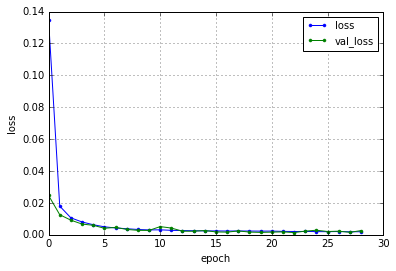

hiden node = 12
Train on 15918 samples, validate on 15918 samples
Epoch 1/50
3s - loss: 0.1113 - val_loss: 0.0199
Epoch 2/50
4s - loss: 0.0127 - val_loss: 0.0080
Epoch 3/50
4s - loss: 0.0062 - val_loss: 0.0047
Epoch 4/50
3s - loss: 0.0047 - val_loss: 0.0040
Epoch 5/50
4s - loss: 0.0040 - val_loss: 0.0031
Epoch 6/50
3s - loss: 0.0034 - val_loss: 0.0026
Epoch 7/50
3s - loss: 0.0030 - val_loss: 0.0025
Epoch 8/50
3s - loss: 0.0028 - val_loss: 0.0037
Epoch 9/50
3s - loss: 0.0026 - val_loss: 0.0017
Epoch 10/50
3s - loss: 0.0027 - val_loss: 0.0020
Epoch 11/50
3s - loss: 0.0024 - val_loss: 0.0018
Epoch 12/50
3s - loss: 0.0023 - val_loss: 0.0015
Epoch 13/50
3s - loss: 0.0023 - val_loss: 0.0020
Epoch 14/50
3s - loss: 0.0022 - val_loss: 0.0017
Epoch 15/50
3s - loss: 0.0021 - val_loss: 0.0047
Epoch 16/50
4s - loss: 0.0022 - val_loss: 0.0012
Epoch 17/50
3s - loss: 0.0022 - val_loss: 0.0014
Epoch 18/50
4s - loss: 0.0020 - val_loss: 0.0011
Epoch 19/50
4s - loss: 0.0020 - val_loss: 0.0019
Epoch 20/50


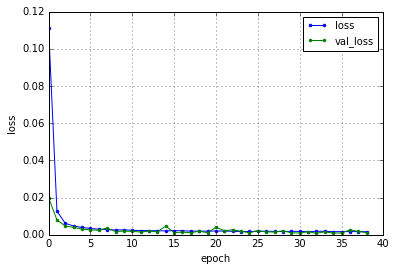

hiden node = 16
Train on 15918 samples, validate on 15918 samples
Epoch 1/50
3s - loss: 0.0808 - val_loss: 0.0124
Epoch 2/50
3s - loss: 0.0087 - val_loss: 0.0061
Epoch 3/50
3s - loss: 0.0051 - val_loss: 0.0045
Epoch 4/50
3s - loss: 0.0039 - val_loss: 0.0045
Epoch 5/50
3s - loss: 0.0032 - val_loss: 0.0042
Epoch 6/50
3s - loss: 0.0028 - val_loss: 0.0023
Epoch 7/50
3s - loss: 0.0025 - val_loss: 0.0018
Epoch 8/50
3s - loss: 0.0024 - val_loss: 0.0017
Epoch 9/50
3s - loss: 0.0023 - val_loss: 0.0020
Epoch 10/50
3s - loss: 0.0022 - val_loss: 0.0014
Epoch 11/50
4s - loss: 0.0019 - val_loss: 0.0013
Epoch 12/50
4s - loss: 0.0021 - val_loss: 0.0043
Epoch 13/50
4s - loss: 0.0021 - val_loss: 0.0019
Epoch 14/50
4s - loss: 0.0021 - val_loss: 0.0016
Epoch 15/50
4s - loss: 0.0021 - val_loss: 0.0013
Epoch 16/50
4s - loss: 0.0021 - val_loss: 0.0020
Epoch 17/50
4s - loss: 0.0020 - val_loss: 0.0024


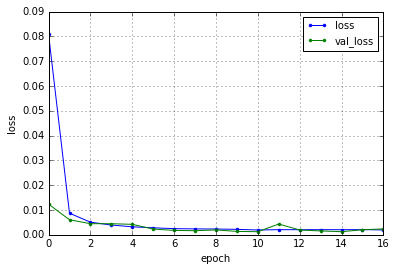

hiden node = 32
Train on 15918 samples, validate on 15918 samples
Epoch 1/50
3s - loss: 0.0627 - val_loss: 0.0072
Epoch 2/50
3s - loss: 0.0046 - val_loss: 0.0043
Epoch 3/50
3s - loss: 0.0032 - val_loss: 0.0021
Epoch 4/50
3s - loss: 0.0027 - val_loss: 0.0020
Epoch 5/50
3s - loss: 0.0025 - val_loss: 0.0015
Epoch 6/50
3s - loss: 0.0021 - val_loss: 0.0034
Epoch 7/50
3s - loss: 0.0022 - val_loss: 0.0018
Epoch 8/50
3s - loss: 0.0022 - val_loss: 0.0018
Epoch 9/50
3s - loss: 0.0023 - val_loss: 0.0015
Epoch 10/50
4s - loss: 0.0022 - val_loss: 0.0027
Epoch 11/50
4s - loss: 0.0024 - val_loss: 0.0014
Epoch 12/50
4s - loss: 0.0023 - val_loss: 0.0011
Epoch 13/50
3s - loss: 0.0021 - val_loss: 0.0012
Epoch 14/50
4s - loss: 0.0021 - val_loss: 0.0010
Epoch 15/50
3s - loss: 0.0020 - val_loss: 0.0015
Epoch 16/50
3s - loss: 0.0021 - val_loss: 0.0012
Epoch 17/50
3s - loss: 0.0020 - val_loss: 0.0021
Epoch 18/50
3s - loss: 0.0022 - val_loss: 0.0012
Epoch 19/50
3s - loss: 0.0019 - val_loss: 0.0011
Epoch 20/50


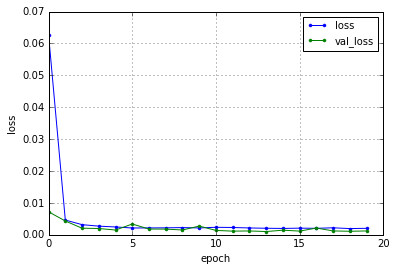

hiden node = 64
Train on 15918 samples, validate on 15918 samples
Epoch 1/50
3s - loss: 0.0450 - val_loss: 0.0039
Epoch 2/50
3s - loss: 0.0033 - val_loss: 0.0028
Epoch 3/50
3s - loss: 0.0025 - val_loss: 0.0015
Epoch 4/50
3s - loss: 0.0023 - val_loss: 0.0019
Epoch 5/50
4s - loss: 0.0023 - val_loss: 0.0034
Epoch 6/50
4s - loss: 0.0022 - val_loss: 0.0022
Epoch 7/50
4s - loss: 0.0022 - val_loss: 9.9786e-04
Epoch 8/50
4s - loss: 0.0021 - val_loss: 0.0012
Epoch 9/50
4s - loss: 0.0022 - val_loss: 0.0025
Epoch 10/50
4s - loss: 0.0022 - val_loss: 0.0011
Epoch 11/50
3s - loss: 0.0021 - val_loss: 0.0026
Epoch 12/50
3s - loss: 0.0020 - val_loss: 0.0018
Epoch 13/50
3s - loss: 0.0021 - val_loss: 0.0014


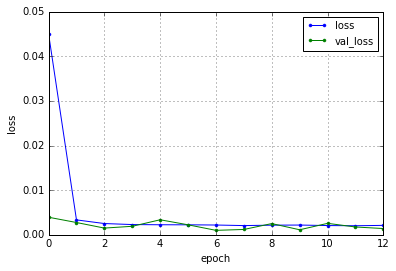

AccX is registed now
Build Complete
(254742,)
windowData's num =7957
SourceData's aborting data = 22
window shape is (7957, 128, 1)
hiden node = 4
Train on 7957 samples, validate on 7957 samples
Epoch 1/50
0s - loss: 0.4393 - val_loss: 0.1352
Epoch 2/50
0s - loss: 0.0797 - val_loss: 0.0549
Epoch 3/50
1s - loss: 0.0483 - val_loss: 0.0440
Epoch 4/50
0s - loss: 0.0420 - val_loss: 0.0401
Epoch 5/50
1s - loss: 0.0392 - val_loss: 0.0385
Epoch 6/50
0s - loss: 0.0377 - val_loss: 0.0360
Epoch 7/50
0s - loss: 0.0357 - val_loss: 0.0352
Epoch 8/50
0s - loss: 0.0334 - val_loss: 0.0355
Epoch 9/50
0s - loss: 0.0309 - val_loss: 0.0292
Epoch 10/50
0s - loss: 0.0286 - val_loss: 0.0275
Epoch 11/50
0s - loss: 0.0263 - val_loss: 0.0246
Epoch 12/50
0s - loss: 0.0245 - val_loss: 0.0230
Epoch 13/50
0s - loss: 0.0233 - val_loss: 0.0219
Epoch 14/50
0s - loss: 0.0217 - val_loss: 0.0205
Epoch 15/50
0s - loss: 0.0208 - val_loss: 0.0196
Epoch 16/50
1s - loss: 0.0201 - val_loss: 0.0193
Epoch 17/50
1s - loss: 0.0198 

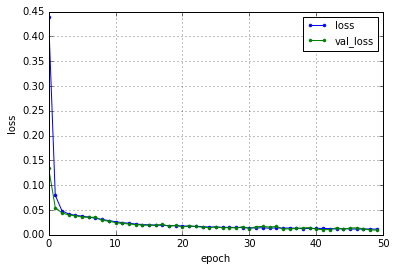

hiden node = 8
Train on 7957 samples, validate on 7957 samples
Epoch 1/50
0s - loss: 0.4794 - val_loss: 0.1258
Epoch 2/50
0s - loss: 0.0716 - val_loss: 0.0492
Epoch 3/50
0s - loss: 0.0441 - val_loss: 0.0409
Epoch 4/50
0s - loss: 0.0388 - val_loss: 0.0373
Epoch 5/50
0s - loss: 0.0359 - val_loss: 0.0323
Epoch 6/50
0s - loss: 0.0316 - val_loss: 0.0292
Epoch 7/50
0s - loss: 0.0268 - val_loss: 0.0239
Epoch 8/50
0s - loss: 0.0230 - val_loss: 0.0218
Epoch 9/50
0s - loss: 0.0209 - val_loss: 0.0198
Epoch 10/50
0s - loss: 0.0191 - val_loss: 0.0202
Epoch 11/50
0s - loss: 0.0177 - val_loss: 0.0166
Epoch 12/50
0s - loss: 0.0166 - val_loss: 0.0180
Epoch 13/50
0s - loss: 0.0158 - val_loss: 0.0144
Epoch 14/50
0s - loss: 0.0153 - val_loss: 0.0169
Epoch 15/50
1s - loss: 0.0148 - val_loss: 0.0138
Epoch 16/50
0s - loss: 0.0142 - val_loss: 0.0132
Epoch 17/50
0s - loss: 0.0138 - val_loss: 0.0127
Epoch 18/50
0s - loss: 0.0134 - val_loss: 0.0135
Epoch 19/50
0s - loss: 0.0124 - val_loss: 0.0110
Epoch 20/50
1s 

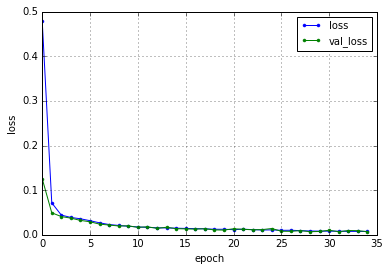

hiden node = 12
Train on 7957 samples, validate on 7957 samples
Epoch 1/50
0s - loss: 0.3425 - val_loss: 0.0754
Epoch 2/50
1s - loss: 0.0534 - val_loss: 0.0428
Epoch 3/50
1s - loss: 0.0387 - val_loss: 0.0357
Epoch 4/50
0s - loss: 0.0340 - val_loss: 0.0287
Epoch 5/50
1s - loss: 0.0271 - val_loss: 0.0240
Epoch 6/50
1s - loss: 0.0227 - val_loss: 0.0188
Epoch 7/50
1s - loss: 0.0188 - val_loss: 0.0165
Epoch 8/50
1s - loss: 0.0167 - val_loss: 0.0167
Epoch 9/50
1s - loss: 0.0154 - val_loss: 0.0186
Epoch 10/50
1s - loss: 0.0132 - val_loss: 0.0125
Epoch 11/50
1s - loss: 0.0126 - val_loss: 0.0106
Epoch 12/50
0s - loss: 0.0114 - val_loss: 0.0097
Epoch 13/50
1s - loss: 0.0107 - val_loss: 0.0090
Epoch 14/50
1s - loss: 0.0102 - val_loss: 0.0108
Epoch 15/50
0s - loss: 0.0094 - val_loss: 0.0100
Epoch 16/50
0s - loss: 0.0090 - val_loss: 0.0071
Epoch 17/50
0s - loss: 0.0089 - val_loss: 0.0089
Epoch 18/50
1s - loss: 0.0087 - val_loss: 0.0084
Epoch 19/50
1s - loss: 0.0076 - val_loss: 0.0109
Epoch 20/50
0s

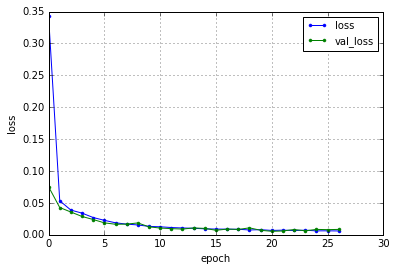

hiden node = 16
Train on 7957 samples, validate on 7957 samples
Epoch 1/50
0s - loss: 0.2801 - val_loss: 0.0511
Epoch 2/50
0s - loss: 0.0425 - val_loss: 0.0378
Epoch 3/50
0s - loss: 0.0327 - val_loss: 0.0338
Epoch 4/50
1s - loss: 0.0257 - val_loss: 0.0211
Epoch 5/50
0s - loss: 0.0213 - val_loss: 0.0179
Epoch 6/50
0s - loss: 0.0177 - val_loss: 0.0183
Epoch 7/50
0s - loss: 0.0153 - val_loss: 0.0129
Epoch 8/50
0s - loss: 0.0136 - val_loss: 0.0106
Epoch 9/50
0s - loss: 0.0114 - val_loss: 0.0100
Epoch 10/50
0s - loss: 0.0105 - val_loss: 0.0109
Epoch 11/50
0s - loss: 0.0096 - val_loss: 0.0083
Epoch 12/50
0s - loss: 0.0089 - val_loss: 0.0076
Epoch 13/50
0s - loss: 0.0086 - val_loss: 0.0061
Epoch 14/50
0s - loss: 0.0078 - val_loss: 0.0094
Epoch 15/50
0s - loss: 0.0079 - val_loss: 0.0091
Epoch 16/50
0s - loss: 0.0069 - val_loss: 0.0079
Epoch 17/50
0s - loss: 0.0070 - val_loss: 0.0051
Epoch 18/50
0s - loss: 0.0070 - val_loss: 0.0107
Epoch 19/50
0s - loss: 0.0067 - val_loss: 0.0117
Epoch 20/50
0s

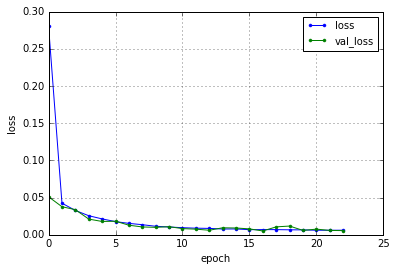

hiden node = 32
Train on 7957 samples, validate on 7957 samples
Epoch 1/50
1s - loss: 0.1857 - val_loss: 0.0397
Epoch 2/50
0s - loss: 0.0298 - val_loss: 0.0236
Epoch 3/50
1s - loss: 0.0189 - val_loss: 0.0158
Epoch 4/50
1s - loss: 0.0144 - val_loss: 0.0106
Epoch 5/50
0s - loss: 0.0116 - val_loss: 0.0098
Epoch 6/50
0s - loss: 0.0095 - val_loss: 0.0087
Epoch 7/50
0s - loss: 0.0086 - val_loss: 0.0112
Epoch 8/50
1s - loss: 0.0068 - val_loss: 0.0051
Epoch 9/50
1s - loss: 0.0070 - val_loss: 0.0075
Epoch 10/50
1s - loss: 0.0066 - val_loss: 0.0057
Epoch 11/50
0s - loss: 0.0062 - val_loss: 0.0066
Epoch 12/50
1s - loss: 0.0055 - val_loss: 0.0037
Epoch 13/50
1s - loss: 0.0055 - val_loss: 0.0041
Epoch 14/50
1s - loss: 0.0053 - val_loss: 0.0036
Epoch 15/50
1s - loss: 0.0053 - val_loss: 0.0064
Epoch 16/50
1s - loss: 0.0049 - val_loss: 0.0030
Epoch 17/50
1s - loss: 0.0049 - val_loss: 0.0043
Epoch 18/50
1s - loss: 0.0049 - val_loss: 0.0047
Epoch 19/50
1s - loss: 0.0050 - val_loss: 0.0028
Epoch 20/50
0s

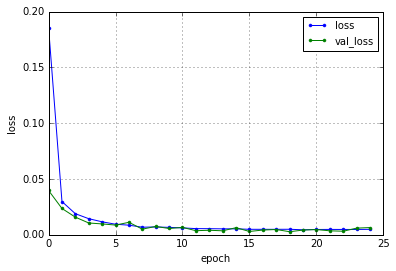

hiden node = 64
Train on 7957 samples, validate on 7957 samples
Epoch 1/50
1s - loss: 0.1285 - val_loss: 0.0305
Epoch 2/50
0s - loss: 0.0212 - val_loss: 0.0161
Epoch 3/50
0s - loss: 0.0134 - val_loss: 0.0128
Epoch 4/50
0s - loss: 0.0099 - val_loss: 0.0069
Epoch 5/50
1s - loss: 0.0084 - val_loss: 0.0058
Epoch 6/50
1s - loss: 0.0070 - val_loss: 0.0047
Epoch 7/50
1s - loss: 0.0062 - val_loss: 0.0065
Epoch 8/50
1s - loss: 0.0062 - val_loss: 0.0060
Epoch 9/50
1s - loss: 0.0057 - val_loss: 0.0050
Epoch 10/50
0s - loss: 0.0056 - val_loss: 0.0036
Epoch 11/50
0s - loss: 0.0055 - val_loss: 0.0044
Epoch 12/50
0s - loss: 0.0051 - val_loss: 0.0046
Epoch 13/50
0s - loss: 0.0053 - val_loss: 0.0030
Epoch 14/50
0s - loss: 0.0047 - val_loss: 0.0027
Epoch 15/50
1s - loss: 0.0049 - val_loss: 0.0088
Epoch 16/50
1s - loss: 0.0051 - val_loss: 0.0043
Epoch 17/50
0s - loss: 0.0045 - val_loss: 0.0028
Epoch 18/50
0s - loss: 0.0045 - val_loss: 0.0117
Epoch 19/50
0s - loss: 0.0045 - val_loss: 0.0054
Epoch 20/50
0s

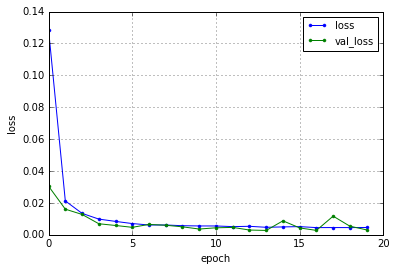

AccX is registed now
Build Complete
(254742,)
windowData's num =3977
SourceData's aborting data = 22
window shape is (3977, 256, 1)
hiden node = 4
Train on 3977 samples, validate on 3977 samples
Epoch 1/50
0s - loss: 0.9224 - val_loss: 0.8010
Epoch 2/50
0s - loss: 0.6855 - val_loss: 0.5739
Epoch 3/50
0s - loss: 0.4881 - val_loss: 0.4065
Epoch 4/50
0s - loss: 0.3444 - val_loss: 0.2856
Epoch 5/50
0s - loss: 0.2417 - val_loss: 0.2004
Epoch 6/50
0s - loss: 0.1702 - val_loss: 0.1422
Epoch 7/50
0s - loss: 0.1224 - val_loss: 0.1043
Epoch 8/50
0s - loss: 0.0921 - val_loss: 0.0814
Epoch 9/50
0s - loss: 0.0744 - val_loss: 0.0685
Epoch 10/50
0s - loss: 0.0649 - val_loss: 0.0619
Epoch 11/50
0s - loss: 0.0600 - val_loss: 0.0582
Epoch 12/50
0s - loss: 0.0570 - val_loss: 0.0565
Epoch 13/50
0s - loss: 0.0553 - val_loss: 0.0547
Epoch 14/50
0s - loss: 0.0541 - val_loss: 0.0543
Epoch 15/50
0s - loss: 0.0534 - val_loss: 0.0543
Epoch 16/50
0s - loss: 0.0530 - val_loss: 0.0526
Epoch 17/50
0s - loss: 0.0526 

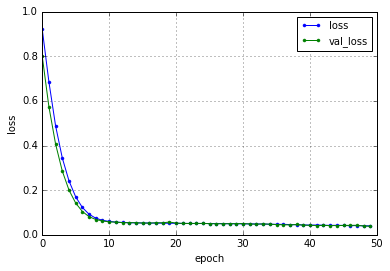

hiden node = 8
Train on 3977 samples, validate on 3977 samples
Epoch 1/50
0s - loss: 0.7822 - val_loss: 0.4961
Epoch 2/50
0s - loss: 0.3375 - val_loss: 0.2156
Epoch 3/50
0s - loss: 0.1559 - val_loss: 0.1104
Epoch 4/50
0s - loss: 0.0889 - val_loss: 0.0729
Epoch 5/50
0s - loss: 0.0660 - val_loss: 0.0613
Epoch 6/50
0s - loss: 0.0593 - val_loss: 0.0577
Epoch 7/50
0s - loss: 0.0564 - val_loss: 0.0554
Epoch 8/50
0s - loss: 0.0545 - val_loss: 0.0538
Epoch 9/50
0s - loss: 0.0534 - val_loss: 0.0532
Epoch 10/50
0s - loss: 0.0527 - val_loss: 0.0522
Epoch 11/50
0s - loss: 0.0521 - val_loss: 0.0526
Epoch 12/50
0s - loss: 0.0518 - val_loss: 0.0512
Epoch 13/50
0s - loss: 0.0515 - val_loss: 0.0507
Epoch 14/50
0s - loss: 0.0509 - val_loss: 0.0514
Epoch 15/50
0s - loss: 0.0511 - val_loss: 0.0514
Epoch 16/50
0s - loss: 0.0505 - val_loss: 0.0494
Epoch 17/50
0s - loss: 0.0508 - val_loss: 0.0491
Epoch 18/50
0s - loss: 0.0495 - val_loss: 0.0486
Epoch 19/50
0s - loss: 0.0493 - val_loss: 0.0487
Epoch 20/50
0s 

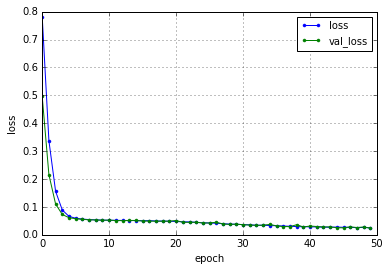

hiden node = 12
Train on 3977 samples, validate on 3977 samples
Epoch 1/50
0s - loss: 0.6574 - val_loss: 0.3427
Epoch 2/50
0s - loss: 0.2127 - val_loss: 0.1252
Epoch 3/50
0s - loss: 0.0931 - val_loss: 0.0718
Epoch 4/50
0s - loss: 0.0645 - val_loss: 0.0599
Epoch 5/50
0s - loss: 0.0583 - val_loss: 0.0568
Epoch 6/50
0s - loss: 0.0558 - val_loss: 0.0551
Epoch 7/50
0s - loss: 0.0542 - val_loss: 0.0543
Epoch 8/50
0s - loss: 0.0531 - val_loss: 0.0527
Epoch 9/50
0s - loss: 0.0522 - val_loss: 0.0528
Epoch 10/50
0s - loss: 0.0517 - val_loss: 0.0513
Epoch 11/50
0s - loss: 0.0510 - val_loss: 0.0546
Epoch 12/50
0s - loss: 0.0512 - val_loss: 0.0550
Epoch 13/50
0s - loss: 0.0505 - val_loss: 0.0537
Epoch 14/50
0s - loss: 0.0507 - val_loss: 0.0498
Epoch 15/50
0s - loss: 0.0494 - val_loss: 0.0507
Epoch 16/50
0s - loss: 0.0494 - val_loss: 0.0491
Epoch 17/50
0s - loss: 0.0486 - val_loss: 0.0463
Epoch 18/50
0s - loss: 0.0467 - val_loss: 0.0446
Epoch 19/50
0s - loss: 0.0458 - val_loss: 0.0447
Epoch 20/50
0s

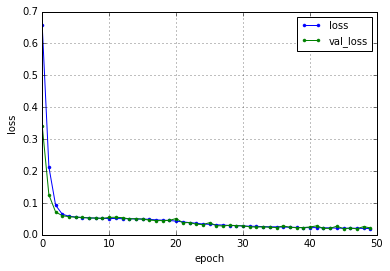

hiden node = 16
Train on 3977 samples, validate on 3977 samples
Epoch 1/50
0s - loss: 0.6411 - val_loss: 0.2702
Epoch 2/50
0s - loss: 0.1530 - val_loss: 0.0858
Epoch 3/50
0s - loss: 0.0693 - val_loss: 0.0605
Epoch 4/50
0s - loss: 0.0581 - val_loss: 0.0564
Epoch 5/50
0s - loss: 0.0554 - val_loss: 0.0545
Epoch 6/50
0s - loss: 0.0537 - val_loss: 0.0530
Epoch 7/50
0s - loss: 0.0523 - val_loss: 0.0543
Epoch 8/50
0s - loss: 0.0510 - val_loss: 0.0503
Epoch 9/50
0s - loss: 0.0497 - val_loss: 0.0483
Epoch 10/50
0s - loss: 0.0482 - val_loss: 0.0485
Epoch 11/50
0s - loss: 0.0465 - val_loss: 0.0517
Epoch 12/50
0s - loss: 0.0447 - val_loss: 0.0423
Epoch 13/50
0s - loss: 0.0413 - val_loss: 0.0386
Epoch 14/50
0s - loss: 0.0396 - val_loss: 0.0361
Epoch 15/50
0s - loss: 0.0372 - val_loss: 0.0375
Epoch 16/50
0s - loss: 0.0350 - val_loss: 0.0344
Epoch 17/50
0s - loss: 0.0337 - val_loss: 0.0335
Epoch 18/50
0s - loss: 0.0317 - val_loss: 0.0289
Epoch 19/50
0s - loss: 0.0297 - val_loss: 0.0291
Epoch 20/50
0s

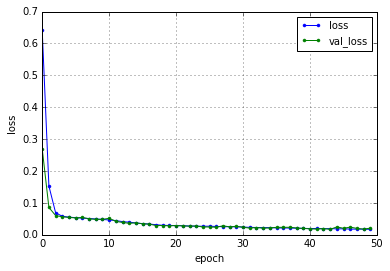

hiden node = 32
Train on 3977 samples, validate on 3977 samples
Epoch 1/50
0s - loss: 0.4711 - val_loss: 0.1288
Epoch 2/50
0s - loss: 0.0792 - val_loss: 0.0595
Epoch 3/50
0s - loss: 0.0566 - val_loss: 0.0548
Epoch 4/50
0s - loss: 0.0533 - val_loss: 0.0519
Epoch 5/50
0s - loss: 0.0506 - val_loss: 0.0489
Epoch 6/50
0s - loss: 0.0472 - val_loss: 0.0455
Epoch 7/50
0s - loss: 0.0444 - val_loss: 0.0425
Epoch 8/50
0s - loss: 0.0407 - val_loss: 0.0392
Epoch 9/50
0s - loss: 0.0373 - val_loss: 0.0334
Epoch 10/50
0s - loss: 0.0342 - val_loss: 0.0362
Epoch 11/50
0s - loss: 0.0320 - val_loss: 0.0304
Epoch 12/50
0s - loss: 0.0308 - val_loss: 0.0290
Epoch 13/50
0s - loss: 0.0285 - val_loss: 0.0364
Epoch 14/50
0s - loss: 0.0273 - val_loss: 0.0350
Epoch 15/50
0s - loss: 0.0262 - val_loss: 0.0248
Epoch 16/50
0s - loss: 0.0253 - val_loss: 0.0272
Epoch 17/50
0s - loss: 0.0243 - val_loss: 0.0242
Epoch 18/50
0s - loss: 0.0235 - val_loss: 0.0228
Epoch 19/50
0s - loss: 0.0228 - val_loss: 0.0293
Epoch 20/50
0s

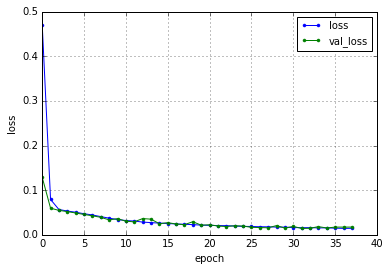

hiden node = 64
Train on 3977 samples, validate on 3977 samples
Epoch 1/50
0s - loss: 0.3475 - val_loss: 0.0663
Epoch 2/50
0s - loss: 0.0575 - val_loss: 0.0542
Epoch 3/50
0s - loss: 0.0516 - val_loss: 0.0488
Epoch 4/50
0s - loss: 0.0451 - val_loss: 0.0428
Epoch 5/50
0s - loss: 0.0378 - val_loss: 0.0354
Epoch 6/50
0s - loss: 0.0326 - val_loss: 0.0302
Epoch 7/50
0s - loss: 0.0290 - val_loss: 0.0260
Epoch 8/50
0s - loss: 0.0266 - val_loss: 0.0283
Epoch 9/50
0s - loss: 0.0247 - val_loss: 0.0236
Epoch 10/50
0s - loss: 0.0228 - val_loss: 0.0216
Epoch 11/50
0s - loss: 0.0213 - val_loss: 0.0246
Epoch 12/50
0s - loss: 0.0207 - val_loss: 0.0210
Epoch 13/50
0s - loss: 0.0194 - val_loss: 0.0221
Epoch 14/50
0s - loss: 0.0190 - val_loss: 0.0163
Epoch 15/50
0s - loss: 0.0179 - val_loss: 0.0173
Epoch 16/50
0s - loss: 0.0169 - val_loss: 0.0203
Epoch 17/50
0s - loss: 0.0160 - val_loss: 0.0232
Epoch 18/50
0s - loss: 0.0159 - val_loss: 0.0184
Epoch 19/50
0s - loss: 0.0157 - val_loss: 0.0152
Epoch 20/50
0s

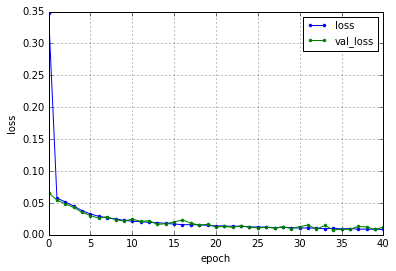

AccX is registed now
Build Complete
(254742,)
windowData's num =1987
SourceData's aborting data = 22
window shape is (1987, 512, 1)
hiden node = 4
Train on 1987 samples, validate on 1987 samples
Epoch 1/50
0s - loss: 1.0057 - val_loss: 0.9636
Epoch 2/50
0s - loss: 0.9191 - val_loss: 0.8635
Epoch 3/50
0s - loss: 0.8191 - val_loss: 0.7677
Epoch 4/50
0s - loss: 0.7280 - val_loss: 0.6822
Epoch 5/50
0s - loss: 0.6469 - val_loss: 0.6062
Epoch 6/50
0s - loss: 0.5748 - val_loss: 0.5387
Epoch 7/50
0s - loss: 0.5108 - val_loss: 0.4787
Epoch 8/50
0s - loss: 0.4541 - val_loss: 0.4256
Epoch 9/50
0s - loss: 0.4038 - val_loss: 0.3786
Epoch 10/50
0s - loss: 0.3593 - val_loss: 0.3370
Epoch 11/50
0s - loss: 0.3199 - val_loss: 0.3002
Epoch 12/50
0s - loss: 0.2851 - val_loss: 0.2678
Epoch 13/50
0s - loss: 0.2544 - val_loss: 0.2392
Epoch 14/50
0s - loss: 0.2274 - val_loss: 0.2139
Epoch 15/50
0s - loss: 0.2036 - val_loss: 0.1918
Epoch 16/50
0s - loss: 0.1827 - val_loss: 0.1723
Epoch 17/50
0s - loss: 0.1643 

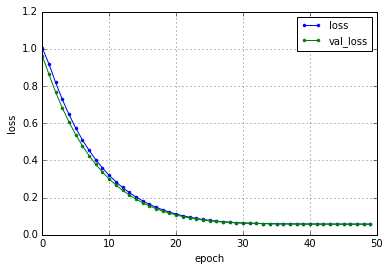

hiden node = 8
Train on 1987 samples, validate on 1987 samples
Epoch 1/50
0s - loss: 0.9802 - val_loss: 0.9120
Epoch 2/50
0s - loss: 0.8446 - val_loss: 0.7612
Epoch 3/50
0s - loss: 0.6975 - val_loss: 0.6260
Epoch 4/50
0s - loss: 0.5738 - val_loss: 0.5153
Epoch 5/50
0s - loss: 0.4727 - val_loss: 0.4250
Epoch 6/50
0s - loss: 0.3903 - val_loss: 0.3514
Epoch 7/50
0s - loss: 0.3233 - val_loss: 0.2917
Epoch 8/50
0s - loss: 0.2689 - val_loss: 0.2433
Epoch 9/50
0s - loss: 0.2249 - val_loss: 0.2042
Epoch 10/50
0s - loss: 0.1893 - val_loss: 0.1727
Epoch 11/50
0s - loss: 0.1607 - val_loss: 0.1473
Epoch 12/50
0s - loss: 0.1377 - val_loss: 0.1269
Epoch 13/50
0s - loss: 0.1193 - val_loss: 0.1107
Epoch 14/50
0s - loss: 0.1046 - val_loss: 0.0979
Epoch 15/50
0s - loss: 0.0931 - val_loss: 0.0878
Epoch 16/50
0s - loss: 0.0841 - val_loss: 0.0799
Epoch 17/50
0s - loss: 0.0771 - val_loss: 0.0739
Epoch 18/50
0s - loss: 0.0718 - val_loss: 0.0694
Epoch 19/50
0s - loss: 0.0678 - val_loss: 0.0660
Epoch 20/50
0s 

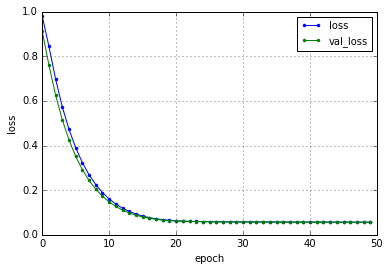

hiden node = 12
Train on 1987 samples, validate on 1987 samples
Epoch 1/50
0s - loss: 0.9650 - val_loss: 0.8688
Epoch 2/50
0s - loss: 0.7850 - val_loss: 0.6893
Epoch 3/50
0s - loss: 0.6185 - val_loss: 0.5395
Epoch 4/50
0s - loss: 0.4836 - val_loss: 0.4222
Epoch 5/50
0s - loss: 0.3792 - val_loss: 0.3321
Epoch 6/50
0s - loss: 0.2992 - val_loss: 0.2631
Epoch 7/50
0s - loss: 0.2381 - val_loss: 0.2106
Epoch 8/50
0s - loss: 0.1915 - val_loss: 0.1707
Epoch 9/50
0s - loss: 0.1562 - val_loss: 0.1404
Epoch 10/50
0s - loss: 0.1295 - val_loss: 0.1176
Epoch 11/50
0s - loss: 0.1094 - val_loss: 0.1006
Epoch 12/50
0s - loss: 0.0945 - val_loss: 0.0879
Epoch 13/50
0s - loss: 0.0834 - val_loss: 0.0786
Epoch 14/50
0s - loss: 0.0754 - val_loss: 0.0720
Epoch 15/50
0s - loss: 0.0697 - val_loss: 0.0673
Epoch 16/50
0s - loss: 0.0657 - val_loss: 0.0641
Epoch 17/50
0s - loss: 0.0630 - val_loss: 0.0619
Epoch 18/50
0s - loss: 0.0613 - val_loss: 0.0606
Epoch 19/50
0s - loss: 0.0602 - val_loss: 0.0597
Epoch 20/50
0s

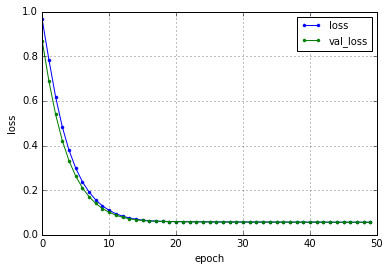

hiden node = 16
Train on 1987 samples, validate on 1987 samples
Epoch 1/50
0s - loss: 0.9632 - val_loss: 0.8273
Epoch 2/50
0s - loss: 0.7032 - val_loss: 0.5672
Epoch 3/50
0s - loss: 0.4784 - val_loss: 0.3858
Epoch 4/50
0s - loss: 0.3278 - val_loss: 0.2676
Epoch 5/50
0s - loss: 0.2300 - val_loss: 0.1912
Epoch 6/50
0s - loss: 0.1670 - val_loss: 0.1420
Epoch 7/50
0s - loss: 0.1265 - val_loss: 0.1104
Epoch 8/50
0s - loss: 0.1005 - val_loss: 0.0903
Epoch 9/50
0s - loss: 0.0840 - val_loss: 0.0776
Epoch 10/50
0s - loss: 0.0737 - val_loss: 0.0696
Epoch 11/50
0s - loss: 0.0673 - val_loss: 0.0648
Epoch 12/50
0s - loss: 0.0634 - val_loss: 0.0620
Epoch 13/50
0s - loss: 0.0612 - val_loss: 0.0603
Epoch 14/50
0s - loss: 0.0599 - val_loss: 0.0595
Epoch 15/50
0s - loss: 0.0592 - val_loss: 0.0590
Epoch 16/50
0s - loss: 0.0589 - val_loss: 0.0588
Epoch 17/50
0s - loss: 0.0587 - val_loss: 0.0586
Epoch 18/50
0s - loss: 0.0585 - val_loss: 0.0584
Epoch 19/50
0s - loss: 0.0583 - val_loss: 0.0582
Epoch 20/50
0s

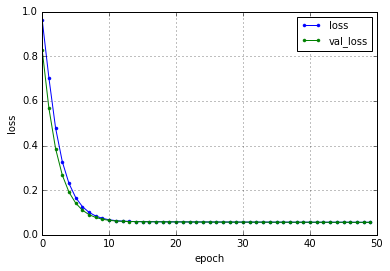

hiden node = 32
Train on 1987 samples, validate on 1987 samples
Epoch 1/50
0s - loss: 0.9068 - val_loss: 0.6743
Epoch 2/50
0s - loss: 0.5133 - val_loss: 0.3552
Epoch 3/50
0s - loss: 0.2711 - val_loss: 0.1925
Epoch 4/50
0s - loss: 0.1536 - val_loss: 0.1179
Epoch 5/50
0s - loss: 0.1005 - val_loss: 0.0845
Epoch 6/50
0s - loss: 0.0768 - val_loss: 0.0697
Epoch 7/50
0s - loss: 0.0663 - val_loss: 0.0632
Epoch 8/50
0s - loss: 0.0617 - val_loss: 0.0604
Epoch 9/50
0s - loss: 0.0598 - val_loss: 0.0592
Epoch 10/50
0s - loss: 0.0589 - val_loss: 0.0587
Epoch 11/50
0s - loss: 0.0586 - val_loss: 0.0584
Epoch 12/50
0s - loss: 0.0584 - val_loss: 0.0582
Epoch 13/50
0s - loss: 0.0581 - val_loss: 0.0579
Epoch 14/50
0s - loss: 0.0578 - val_loss: 0.0577
Epoch 15/50
0s - loss: 0.0576 - val_loss: 0.0575
Epoch 16/50
0s - loss: 0.0574 - val_loss: 0.0573
Epoch 17/50
0s - loss: 0.0573 - val_loss: 0.0572
Epoch 18/50
0s - loss: 0.0571 - val_loss: 0.0570
Epoch 19/50
0s - loss: 0.0570 - val_loss: 0.0569
Epoch 20/50
0s

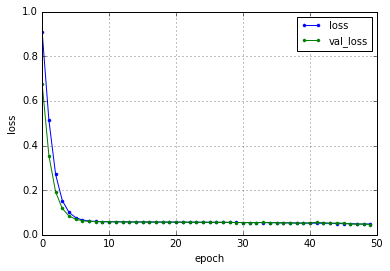

hiden node = 64
Train on 1987 samples, validate on 1987 samples
Epoch 1/50
0s - loss: 0.7896 - val_loss: 0.4541
Epoch 2/50
0s - loss: 0.2930 - val_loss: 0.1641
Epoch 3/50
0s - loss: 0.1193 - val_loss: 0.0849
Epoch 4/50
0s - loss: 0.0734 - val_loss: 0.0647
Epoch 5/50
0s - loss: 0.0619 - val_loss: 0.0597
Epoch 6/50
0s - loss: 0.0589 - val_loss: 0.0583
Epoch 7/50
0s - loss: 0.0581 - val_loss: 0.0578
Epoch 8/50
0s - loss: 0.0577 - val_loss: 0.0575
Epoch 9/50
0s - loss: 0.0574 - val_loss: 0.0573
Epoch 10/50
0s - loss: 0.0571 - val_loss: 0.0569
Epoch 11/50
0s - loss: 0.0567 - val_loss: 0.0564
Epoch 12/50
0s - loss: 0.0562 - val_loss: 0.0560
Epoch 13/50
0s - loss: 0.0557 - val_loss: 0.0555
Epoch 14/50
0s - loss: 0.0552 - val_loss: 0.0549
Epoch 15/50
0s - loss: 0.0545 - val_loss: 0.0543
Epoch 16/50
0s - loss: 0.0541 - val_loss: 0.0536
Epoch 17/50
0s - loss: 0.0534 - val_loss: 0.0534
Epoch 18/50
0s - loss: 0.0525 - val_loss: 0.0518
Epoch 19/50
0s - loss: 0.0519 - val_loss: 0.0514
Epoch 20/50
0s

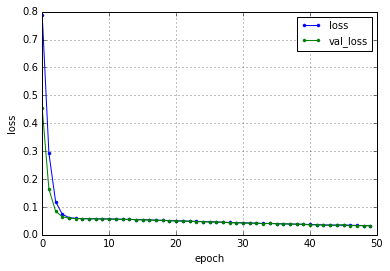

AccX is registed now
Build Complete
(254742,)
windowData's num =992
SourceData's aborting data = 22
window shape is (992, 1024, 1)
hiden node = 4
Train on 992 samples, validate on 992 samples
Epoch 1/50
0s - loss: 1.0196 - val_loss: 1.0091
Epoch 2/50
0s - loss: 1.0026 - val_loss: 0.9903
Epoch 3/50
0s - loss: 0.9827 - val_loss: 0.9693
Epoch 4/50
0s - loss: 0.9617 - val_loss: 0.9483
Epoch 5/50
0s - loss: 0.9408 - val_loss: 0.9276
Epoch 6/50
0s - loss: 0.9202 - val_loss: 0.9073
Epoch 7/50
0s - loss: 0.9000 - val_loss: 0.8873
Epoch 8/50
0s - loss: 0.8802 - val_loss: 0.8677
Epoch 9/50
0s - loss: 0.8607 - val_loss: 0.8485
Epoch 10/50
0s - loss: 0.8416 - val_loss: 0.8297
Epoch 11/50
0s - loss: 0.8229 - val_loss: 0.8112
Epoch 12/50
0s - loss: 0.8046 - val_loss: 0.7931
Epoch 13/50
0s - loss: 0.7867 - val_loss: 0.7754
Epoch 14/50
0s - loss: 0.7691 - val_loss: 0.7581
Epoch 15/50
0s - loss: 0.7519 - val_loss: 0.7411
Epoch 16/50
0s - loss: 0.7350 - val_loss: 0.7244
Epoch 17/50
0s - loss: 0.7185 - v

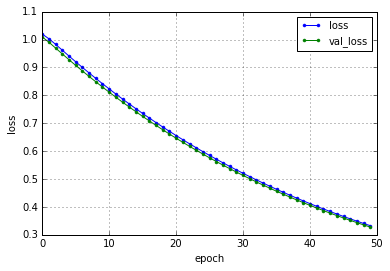

hiden node = 8
Train on 992 samples, validate on 992 samples
Epoch 1/50
0s - loss: 1.0190 - val_loss: 0.9989
Epoch 2/50
0s - loss: 0.9860 - val_loss: 0.9619
Epoch 3/50
0s - loss: 0.9476 - val_loss: 0.9226
Epoch 4/50
0s - loss: 0.9086 - val_loss: 0.8844
Epoch 5/50
0s - loss: 0.8709 - val_loss: 0.8475
Epoch 6/50
0s - loss: 0.8346 - val_loss: 0.8121
Epoch 7/50
0s - loss: 0.7997 - val_loss: 0.7781
Epoch 8/50
0s - loss: 0.7662 - val_loss: 0.7455
Epoch 9/50
0s - loss: 0.7341 - val_loss: 0.7142
Epoch 10/50
0s - loss: 0.7032 - val_loss: 0.6842
Epoch 11/50
0s - loss: 0.6737 - val_loss: 0.6555
Epoch 12/50
0s - loss: 0.6454 - val_loss: 0.6280
Epoch 13/50
0s - loss: 0.6183 - val_loss: 0.6016
Epoch 14/50
0s - loss: 0.5924 - val_loss: 0.5764
Epoch 15/50
0s - loss: 0.5675 - val_loss: 0.5522
Epoch 16/50
0s - loss: 0.5438 - val_loss: 0.5291
Epoch 17/50
0s - loss: 0.5210 - val_loss: 0.5070
Epoch 18/50
0s - loss: 0.4992 - val_loss: 0.4858
Epoch 19/50
0s - loss: 0.4784 - val_loss: 0.4655
Epoch 20/50
0s - 

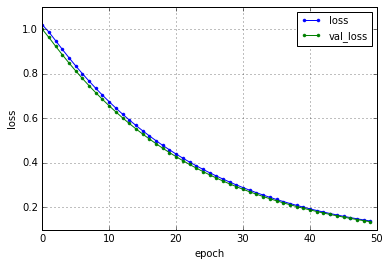

hiden node = 12
Train on 992 samples, validate on 992 samples
Epoch 1/50
0s - loss: 1.0265 - val_loss: 1.0022
Epoch 2/50
0s - loss: 0.9881 - val_loss: 0.9616
Epoch 3/50
0s - loss: 0.9450 - val_loss: 0.9146
Epoch 4/50
0s - loss: 0.8961 - val_loss: 0.8629
Epoch 5/50
0s - loss: 0.8437 - val_loss: 0.8103
Epoch 6/50
0s - loss: 0.7918 - val_loss: 0.7599
Epoch 7/50
0s - loss: 0.7424 - val_loss: 0.7124
Epoch 8/50
0s - loss: 0.6960 - val_loss: 0.6679
Epoch 9/50
0s - loss: 0.6526 - val_loss: 0.6262
Epoch 10/50
0s - loss: 0.6118 - val_loss: 0.5872
Epoch 11/50
0s - loss: 0.5737 - val_loss: 0.5507
Epoch 12/50
0s - loss: 0.5381 - val_loss: 0.5165
Epoch 13/50
0s - loss: 0.5048 - val_loss: 0.4846
Epoch 14/50
0s - loss: 0.4736 - val_loss: 0.4548
Epoch 15/50
0s - loss: 0.4445 - val_loss: 0.4269
Epoch 16/50
0s - loss: 0.4174 - val_loss: 0.4009
Epoch 17/50
0s - loss: 0.3920 - val_loss: 0.3767
Epoch 18/50
0s - loss: 0.3683 - val_loss: 0.3540
Epoch 19/50
0s - loss: 0.3462 - val_loss: 0.3328
Epoch 20/50
0s -

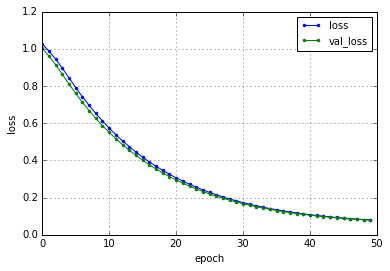

hiden node = 16
Train on 992 samples, validate on 992 samples
Epoch 1/50
0s - loss: 1.0172 - val_loss: 0.9918
Epoch 2/50
0s - loss: 0.9740 - val_loss: 0.9379
Epoch 3/50
0s - loss: 0.9133 - val_loss: 0.8685
Epoch 4/50
0s - loss: 0.8428 - val_loss: 0.7985
Epoch 5/50
0s - loss: 0.7743 - val_loss: 0.7330
Epoch 6/50
0s - loss: 0.7107 - val_loss: 0.6727
Epoch 7/50
0s - loss: 0.6523 - val_loss: 0.6174
Epoch 8/50
0s - loss: 0.5988 - val_loss: 0.5669
Epoch 9/50
0s - loss: 0.5498 - val_loss: 0.5207
Epoch 10/50
0s - loss: 0.5051 - val_loss: 0.4785
Epoch 11/50
0s - loss: 0.4643 - val_loss: 0.4400
Epoch 12/50
0s - loss: 0.4270 - val_loss: 0.4049
Epoch 13/50
0s - loss: 0.3931 - val_loss: 0.3729
Epoch 14/50
0s - loss: 0.3621 - val_loss: 0.3437
Epoch 15/50
0s - loss: 0.3339 - val_loss: 0.3171
Epoch 16/50
0s - loss: 0.3082 - val_loss: 0.2929
Epoch 17/50
0s - loss: 0.2847 - val_loss: 0.2709
Epoch 18/50
0s - loss: 0.2634 - val_loss: 0.2508
Epoch 19/50
0s - loss: 0.2440 - val_loss: 0.2325
Epoch 20/50
0s -

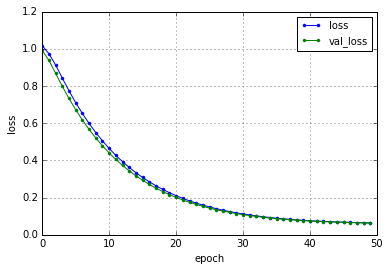

hiden node = 32
Train on 992 samples, validate on 992 samples
Epoch 1/50
0s - loss: 1.0120 - val_loss: 0.9615
Epoch 2/50
0s - loss: 0.9258 - val_loss: 0.8570
Epoch 3/50
0s - loss: 0.8142 - val_loss: 0.7384
Epoch 4/50
0s - loss: 0.6964 - val_loss: 0.6256
Epoch 5/50
0s - loss: 0.5891 - val_loss: 0.5285
Epoch 6/50
0s - loss: 0.4978 - val_loss: 0.4471
Epoch 7/50
0s - loss: 0.4216 - val_loss: 0.3795
Epoch 8/50
0s - loss: 0.3583 - val_loss: 0.3233
Epoch 9/50
0s - loss: 0.3058 - val_loss: 0.2768
Epoch 10/50
0s - loss: 0.2623 - val_loss: 0.2383
Epoch 11/50
0s - loss: 0.2263 - val_loss: 0.2065
Epoch 12/50
0s - loss: 0.1966 - val_loss: 0.1803
Epoch 13/50
0s - loss: 0.1721 - val_loss: 0.1586
Epoch 14/50
0s - loss: 0.1518 - val_loss: 0.1407
Epoch 15/50
0s - loss: 0.1352 - val_loss: 0.1260
Epoch 16/50
0s - loss: 0.1214 - val_loss: 0.1139
Epoch 17/50
0s - loss: 0.1101 - val_loss: 0.1039
Epoch 18/50
0s - loss: 0.1008 - val_loss: 0.0957
Epoch 19/50
0s - loss: 0.0932 - val_loss: 0.0890
Epoch 20/50
0s -

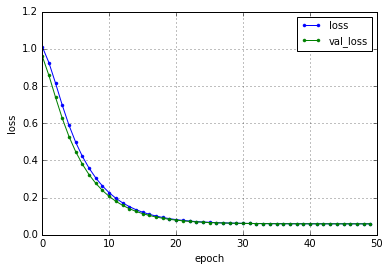

hiden node = 64
Train on 992 samples, validate on 992 samples
Epoch 1/50
0s - loss: 1.0123 - val_loss: 0.9002
Epoch 2/50
0s - loss: 0.8424 - val_loss: 0.7356
Epoch 3/50
0s - loss: 0.6732 - val_loss: 0.5671
Epoch 4/50
0s - loss: 0.5131 - val_loss: 0.4258
Epoch 5/50
0s - loss: 0.3846 - val_loss: 0.3193
Epoch 6/50
0s - loss: 0.2893 - val_loss: 0.2423
Epoch 7/50
0s - loss: 0.2210 - val_loss: 0.1875
Epoch 8/50
0s - loss: 0.1723 - val_loss: 0.1486
Epoch 9/50
0s - loss: 0.1380 - val_loss: 0.1213
Epoch 10/50
0s - loss: 0.1138 - val_loss: 0.1022
Epoch 11/50
0s - loss: 0.0970 - val_loss: 0.0888
Epoch 12/50
0s - loss: 0.0852 - val_loss: 0.0796
Epoch 13/50
0s - loss: 0.0771 - val_loss: 0.0732
Epoch 14/50
0s - loss: 0.0715 - val_loss: 0.0688
Epoch 15/50
0s - loss: 0.0676 - val_loss: 0.0657
Epoch 16/50
0s - loss: 0.0649 - val_loss: 0.0636
Epoch 17/50
0s - loss: 0.0631 - val_loss: 0.0622
Epoch 18/50
0s - loss: 0.0618 - val_loss: 0.0612
Epoch 19/50
0s - loss: 0.0609 - val_loss: 0.0605
Epoch 20/50
0s -

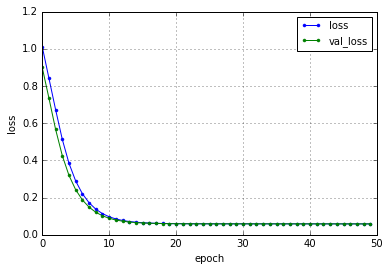

In [7]:
# loop windowWidth
for SampleNum,Overlap in zip(WindowWidth,OverlapArray):
    w=window.Window()
    w.SetData(Axis,dic[Axis])
    wind=w.Compile(windowWidth=SampleNum,overlapNum=Overlap)
    windoW=wind.reshape((len(wind),np.prod(wind.shape[1:])))
    
    # define SaveFileName
    for encoding_dim in EncodingDim:
        print "hiden node = "+str(encoding_dim)
        SaveFileNameEncord=DataName+'_encoded'+'_edim='+str(encoding_dim)+'-Window='+str(SampleNum)+'-Overlap='+str(Overlap*100)
        SaveFileNameDecord=DataName+'_decoded'+'_edim='+str(encoding_dim)+'-Window='+str(SampleNum)+'-Overlap='+str(Overlap*100)
        SaveFileNameNet=DataName+'_net'+'_edim='+str(encoding_dim)+'-Window='+str(SampleNum)+'-Overlap='+str(Overlap*100)
        SaveFileNameTrain=DataName+'_train'+'_edim='+str(encoding_dim)+'-Window='+str(SampleNum)+'-Overlap='+str(Overlap*100)
        SaveFileNameTest=DataName+'_test'+'_edim='+str(encoding_dim)+'-Window='+str(SampleNum)+'-Overlap='+str(Overlap*100)
        SaveFileNameGlaph=GlaphDataPath+DataName+'_edim='+str(encoding_dim)+'-Window='+str(SampleNum)+'-Overlap='+str(Overlap*100)+'_loss_val_loss.png'

        window_test=windoW
        window_train=windoW
        processing.SaveDicDataFromFileNPZ(WindowDataPath,SaveFileNameTrain,window_test)
        processing.SaveDicDataFromFileNPZ(WindowDataPath,SaveFileNameTest,window_test)
        shapeNum=windoW.shape[1]

        # this is our input placeholder
        input_img = Input(shape=(shapeNum,))
        # "encoded" is the encoded representation of the input
        encoded = Dense(encoding_dim, activation='tanh')(input_img)
        # "decoded" is the lossy reconstruction of the input
        decoded = Dense(shapeNum, activation='linear')(encoded)

        # this model maps an input to its reconstruction
        autoencoder = Model(input=input_img, output=decoded)

        # this model maps an input to its encoded representation
        encoder = Model(input=input_img, output=encoded)

        # create a placeholder for an encoded (32-dimensional) input
        encoded_input = Input(shape=(encoding_dim,))
        # retrieve the last layer of the autoencoder model
        decoder_layer = autoencoder.layers[-1]
        # create the decoder model
        decoder = Model(input=encoded_input, output=decoder_layer(encoded_input))

        autoencoder.compile(optimizer='adadelta', loss='mse')
        plot(autoencoder,  to_file=StudyDataModelPicPath+SaveFileNameNet+'.png')

        early_stopping = EarlyStopping(monitor='val_loss', patience=5)
        hist = autoencoder.fit(window_train, window_train,
                        nb_epoch=50,
                        verbose=2,
                        batch_size=shapeNum/4,
                        shuffle=True,
                        validation_data=(window_test, window_test),
                        callbacks=[early_stopping])

        encoded_imgs = encoder.predict(window_test)
        decoded_imgs = decoder.predict(encoded_imgs)

        processing.SaveDicDataFromFileNPZ(StudyDataPath,SaveFileNameEncord,encoded_imgs)
        processing.SaveDicDataFromFileNPZ(StudyDataPath,SaveFileNameDecord,decoded_imgs)

        # save model and wights
        json_string = encoder.to_json()
        open(StudyDataPath+SaveFileNameEncord+'.json', 'w').write(json_string)
        encoder.save_weights(StudyDataPath+SaveFileNameEncord+'_weights.h5',overwrite=True)

        json_string = decoder.to_json()
        open(StudyDataPath+SaveFileNameDecord+'.json', 'w').write(json_string)
        decoder.save_weights(StudyDataPath+SaveFileNameDecord+'_weights.h5',overwrite=True)

        json_string = autoencoder.to_json()
        open(StudyDataPath+SaveFileNameNet+'.json', 'w').write(json_string)
        autoencoder.save_weights(StudyDataPath+SaveFileNameNet+'_weights.h5',overwrite=True)

        # plot loss
        loss = hist.history['loss']
        val_loss = hist.history['val_loss']

        nb_epoch = len(loss)
        plt.plot(range(nb_epoch), loss, marker='.', label='loss')
        plt.plot(range(nb_epoch), val_loss, marker='.', label='val_loss')
        plt.legend(loc='best', fontsize=10)
        plt.grid()
        plt.xlabel('epoch')
        plt.ylabel('loss')
        plt.savefig(SaveFileNameGlaph)
        plt.show()